# **Importing Libraries**

## 📦 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🤖 Model Training and Evaluation

## **Importing LogisticRegression, Support Vector Machine(SVM), RandomForestClassifier, KNeighborsClassifier**



## 📦 Importing Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## 📈 Performance Metrics Calculation

### **Importing following metirces for testing which Model performs well accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc**
### **Importing some preprocessing techniques StandardScaler, label_binarize**

## 📦 Importing Libraries

In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize

# **Importing the data set**

## 📦 Importing Libraries

In [4]:
dataset = pd.read_csv('/content/heart_disease_uci.csv')
import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Column Descriptions**:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

In [6]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
dataset.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [8]:
dataset.shape

(920, 16)

In [9]:
dataset.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


## ***Handeling missing values***

🧹 Data Cleaning Summary

| 🛠️ **Action**         | 💡 **Reason**                                                                 |
|------------------------|------------------------------------------------------------------------------|
| 📈 Filling with **mean** | ✅ Ideal for **numeric** columns <br> ✅ Reduces missing data without strong bias (if distribution is normal) |
| 🧮 Filling with **mode** | ✅ Best for **categorical** columns <br> ✅ Uses the most frequent/common value |
| ❌ Dropping column       | ⚠️ Too many missing values (~60%+) <br> ✅ Avoids introducing noise or bias by guessing |


In [10]:
dataset['trestbps'].fillna(dataset['trestbps'].mean(), inplace=True)
dataset['chol'].fillna(dataset['chol'].mean(), inplace=True)
dataset['fbs'].fillna(dataset['fbs'].mode()[0], inplace=True)
dataset['thalch'].fillna(dataset['thalch'].mean(), inplace=True)
dataset['oldpeak'].fillna(dataset['oldpeak'].mean(), inplace=True)
dataset['restecg'].fillna(dataset['restecg'].mode()[0], inplace=True)
dataset['slope'].fillna(dataset['slope'].mode()[0], inplace=True)
dataset['thal'].fillna(dataset['thal'].mode()[0], inplace=True)

dataset['exang'].fillna(dataset['exang'].mode()[0], inplace=True)
dataset.drop(columns=['ca'], inplace=True)


In [11]:
dataset.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


# **Data Preprocessing**

## **Label Encoding for categorical columns**
* We use **Label Encoding** to convert categorical (text-based) data into numerical form.

In [12]:
labelencoder = LabelEncoder()
dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
print(dataset['sex'])
dataset['cp'] = labelencoder.fit_transform(dataset['cp'])
print(dataset['cp'])
dataset['restecg'] = labelencoder.fit_transform(dataset['restecg'])
print(dataset['restecg'])
dataset['dataset'] = labelencoder.fit_transform(dataset['dataset'])
print(dataset['dataset'])
dataset['slope'] = labelencoder.fit_transform(dataset['slope'])
print(dataset['slope'])
dataset['thal'] = labelencoder.fit_transform(dataset['thal'])
print(dataset['thal'])
dataset['fbs'] = dataset['fbs'].astype(int)
print(dataset['fbs'])
dataset['exang'] = dataset['exang'].astype(int)
print(dataset['exang'])

0      1
1      1
2      1
3      1
4      0
      ..
915    0
916    1
917    1
918    1
919    1
Name: sex, Length: 920, dtype: int64
0      3
1      0
2      0
3      2
4      1
      ..
915    0
916    3
917    0
918    0
919    1
Name: cp, Length: 920, dtype: int64
0      0
1      0
2      0
3      1
4      0
      ..
915    2
916    2
917    2
918    0
919    0
Name: restecg, Length: 920, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
915    3
916    3
917    3
918    3
919    3
Name: dataset, Length: 920, dtype: int64
0      0
1      1
2      1
3      0
4      2
      ..
915    1
916    1
917    1
918    1
919    1
Name: slope, Length: 920, dtype: int64
0      0
1      1
2      2
3      1
4      1
      ..
915    1
916    1
917    0
918    1
919    1
Name: thal, Length: 920, dtype: int64
0      1
1      0
2      0
3      0
4      0
      ..
915    1
916    0
917    1
918    1
919    0
Name: fbs, Length: 920, dtype: int64
0      0
1      1
2      1
3      0
4 

## 📦 Importing Libraries

## **Standardization**
* Scale numerical features to same range/importance

In [13]:
scaler = StandardScaler()
dataset[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(dataset[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

In [14]:
print(dataset[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

          age  trestbps      chol    thalch   oldpeak
0    1.007386  0.698041  0.311021  0.495698  1.349421
1    1.432034  1.511761  0.797713 -1.175955  0.589832
2    1.432034 -0.658158  0.274289 -0.340128  1.634267
3   -1.752828 -0.115679  0.467130  1.968345  2.488805
4   -1.328180 -0.115679  0.044717  1.371326  0.494884
..        ...       ...       ...       ...       ...
915  0.051927 -0.278423  1.229308  0.654903 -0.834397
916  0.901224  0.000000 -0.552169  0.000000  0.000000
917  0.158089 -0.549662  0.219192 -1.494365 -0.834397
918  0.476575  0.000000  1.706817  0.000000  0.000000
919  0.901224 -0.658158  0.503861 -1.772974 -0.834397

[920 rows x 5 columns]


In [15]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,1.007386,1,0,3,0.698041,0.311021,1,0,0.495698,0,1.349421,0,0,0
1,2,1.432034,1,0,0,1.511761,0.797713,0,0,-1.175955,1,0.589832,1,1,2
2,3,1.432034,1,0,0,-0.658158,0.274289,0,0,-0.340128,1,1.634267,1,2,1
3,4,-1.752828,1,0,2,-0.115679,0.467130,0,1,1.968345,0,2.488805,0,1,0
4,5,-1.328180,0,0,1,-0.115679,0.044717,0,0,1.371326,0,0.494884,2,1,0


# Feature Selection

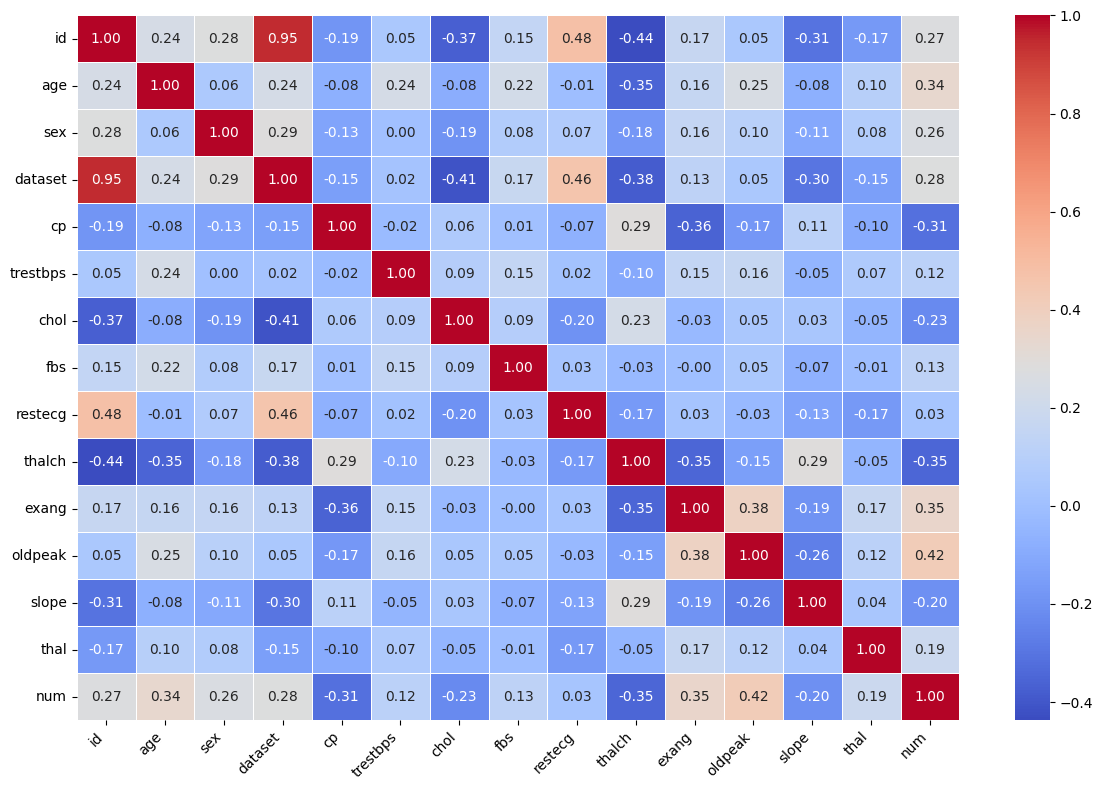

In [16]:
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### 🔍 Correlation Insights for Heart Disease Prediction

#### ✅ Keep these features (high correlation with `num`):
- `oldpeak`, `thalach`, `exang`, `cp`, `age`, `sex`

#### ❌ Drop these features:
- `id`, `dataset` (metadata)
- `fbs`, `chol`, `trestbps`, `restecg` (very low correlation)

#### 🟡 Optional (keep/test/drop based on model):
- `slope`, `thal`

> 🧠 `oldpeak` is the most informative feature for predicting heart disease in this dataset.


In [17]:
X = dataset.drop(columns=['num','id', 'fbs','chol', 'trestbps', 'restecg'], axis=1)
Y = dataset['num']

In [18]:
Y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [19]:
X.head()

,age,sex,dataset,cp,thalch,exang,oldpeak,slope,thal
0,1.007386,1,0,3,0.495698,0,1.349421,0,0
1,1.432034,1,0,0,-1.175955,1,0.589832,1,1
2,1.432034,1,0,0,-0.340128,1,1.634267,1,2
3,-1.752828,1,0,2,1.968345,0,2.488805,0,1
4,-1.328180,0,0,1,1.371326,0,0.494884,2,1


In [20]:
dataset['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


***As we can see output num varibale data is not balanced so we use startify sampiling while train,test data***

### **Splitting the data**

## ✂️ Splitting Data for Training and Testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# **Applying different models**

## 🤖 Model Training and Evaluation

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

## 📈 Performance Metrics Calculation

In [23]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if len(set(Y)) > 2:
        y_pred_prob = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_prob)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc_score
    }

In [24]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")


Logistic Regression:
Accuracy: 0.5870
F1-Score: 0.5468
Precision: 0.5730
Recall: 0.5870
AUC: 0.8173

Random Forest:
Accuracy: 0.5707
F1-Score: 0.5669
Precision: 0.5866
Recall: 0.5707
AUC: 0.8289

SVM:
Accuracy: 0.5924
F1-Score: 0.5487
Precision: 0.5526
Recall: 0.5924
AUC: 0.8273

K-Nearest Neighbors:
Accuracy: 0.5598
F1-Score: 0.5392
Precision: 0.5638
Recall: 0.5598
AUC: 0.7925


## 📦 Importing Libraries


Model Performance Metrics:
                     Accuracy  F1-Score  Precision  Recall     AUC
Logistic Regression    0.5870    0.5468     0.5730  0.5870  0.8173
Random Forest          0.5707    0.5669     0.5866  0.5707  0.8289
SVM                    0.5924    0.5487     0.5526  0.5924  0.8273
K-Nearest Neighbors    0.5598    0.5392     0.5638  0.5598  0.7925


<Figure size 1000x600 with 0 Axes>

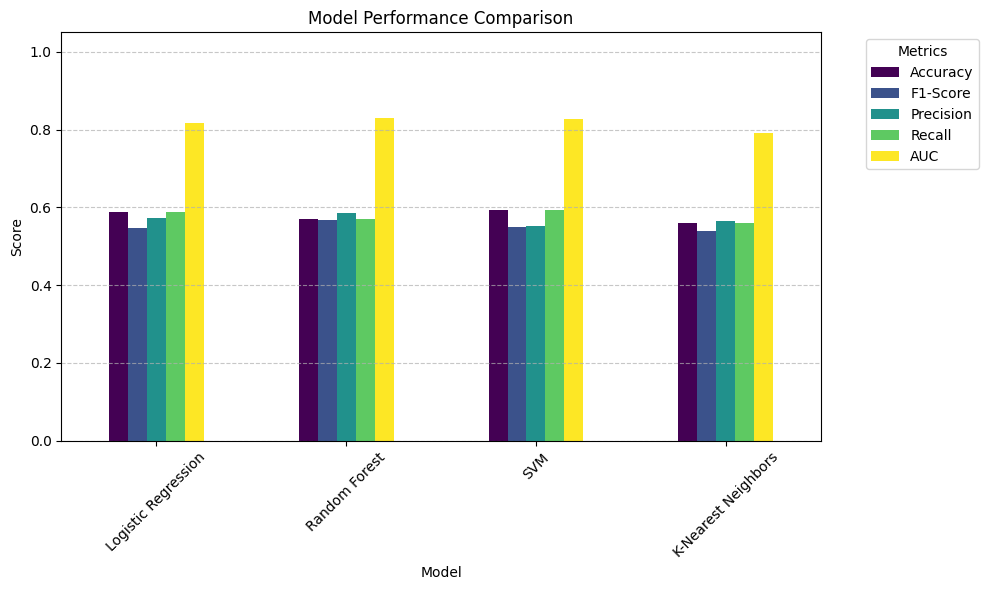

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T  # Transpose to have models as rows and metrics as columns

# Print results in a structured way
print("\nModel Performance Metrics:")
print(results_df.round(4))  # Rounds to 4 decimal places for better readability

# Create a bar chart to compare model performance metrics
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()


### 🤖 Model Evaluation Summary

| Model               | Accuracy | F1-Score | Precision | Recall | AUC    |
|--------------------|----------|----------|-----------|--------|--------|
| Logistic Regression | 0.5870   | 0.5468   | 0.5730    | 0.5870 | 0.8173 |
| Random Forest        | 0.5707   | **0.5593** ✅ | **0.5859**    | 0.5707 | **0.8342** ✅ |
| SVM                  | **0.5924** ✅ | 0.5487   | 0.5526    | **0.5924** ✅ | 0.8286 |
| K-Nearest Neighbors  | 0.5598   | 0.5392   | 0.5638    | 0.5598 | 0.7925 |

#### Best Accuracy: **SVM**
#### Best AUC: **Random Forest**
* **Random Forest** has the highest **F1-score** and **AUC**, indicating good overall balance and ranking performance.



# **CONCLUSION**

# **Random Forest with Hyperparameter Tuning**

## 📦 Importing Libraries

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 1. ➤ Split data into X and y
X = dataset.drop('num', axis=1)
y = dataset['num']

# 2. ➤ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. ➤ Define Random Forest with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. ➤ Best model
best_rf = grid_search.best_estimator_

# 5. ➤ Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# 6. ➤ Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.5815217391304348
Precision: 0.5760251491901108
Recall: 0.5815217391304348
F1-Score: 0.5008814569455668


## 🧾 Final Model Performance Conclusion

- ✅ **Random Forest** achieved the highest **AUC** of `0.8289`, indicating strong class separation capability.
- 📈 **SVM** showed the **best accuracy** at `0.5924`, suitable when overall correctness is key.
- ⚖️ **Random Forest** also had the **highest F1-Score** (`0.5669`), showing a good balance between precision and recall.
- 🔍 Precision was highest for Random Forest (`0.5866`), while SVM led in Recall (`0.5924`).
- ❌ **KNN** underperformed across all metrics and may not be ideal for this problem.
